This file helps to summarize the output files over several runs.
It plots the train and prediction datasets of multiple runs in one large pdf file.

In [45]:
# script to run deepmod for ODEs

# General imports
import numpy as np
import matplotlib.pylab as plt
import os
import pandas as pd
import re
import math

In [55]:
# load folder directory of batch
# batch = "batch_10-17_VanderPol"
# batch = "batch_10-20_3DLV"
# batch = "batch_10-11_miaSimS4_new"
# batch = "batch_10-20_humanTS_female"
batch = "batch_10-23_humanTS_female_test"
# batch = "batch_10-12_humanTS_male_Genus10"
# batch = "batch_10-18_Ushio"

out_dir_org = f"deepmod_output/output_LRZ_Cluster/{batch}/"

# set the run specifications
# n_taxa = 2
# n_taxa = 3
n_taxa = 10

# hl_number = 20
# hl_size = 60
# th = "0_001"

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# list files in batch run
os.listdir(out_dir_org)

['approximations_int2_x1.pdf',
 'approximations_int2_x10.pdf',
 'approximations_int2_x2.pdf',
 'approximations_int2_x3.pdf',
 'approximations_int2_x4.pdf',
 'approximations_int2_x5.pdf',
 'approximations_int2_x6.pdf',
 'approximations_int2_x7.pdf',
 'approximations_int2_x8.pdf',
 'approximations_int2_x9.pdf',
 'approximations_only-fitting_x1.pdf',
 'approximations_only-fitting_x10.pdf',
 'approximations_only-fitting_x2.pdf',
 'approximations_only-fitting_x3.pdf',
 'approximations_only-fitting_x4.pdf',
 'approximations_only-fitting_x5.pdf',
 'approximations_only-fitting_x6.pdf',
 'approximations_only-fitting_x7.pdf',
 'approximations_only-fitting_x8.pdf',
 'approximations_only-fitting_x9.pdf',
 'output_batch_10-23_humanTS_female_test_run01_female_Genus10_ALR_1_100_only-fitting',
 'output_batch_10-23_humanTS_female_test_run01_female_Genus10_ALR_1_100_th0-01_int2',
 'output_batch_10-23_humanTS_female_test_run01_female_Genus10_ALR_1_200_only-fitting',
 'output_batch_10-23_humanTS_female_te

### Summarize over certain scenarios

Given a certain scenario specified by 

* number and size of hidden layers and 
* the threshold value,

the following script searches for all files (or runs) that satisfy these specifications and searches for the "data_train" and "prediction" tables in each outputs.

Then it creates plots out of the data and saves all plots of one scenario in one file "predictions_{batch}_{hl_number}_{hl_size}_th{th}.pdf".

## General datasets

### Summarize over one taxon and all runs (with a certain specification like "only-fitting") in a folder

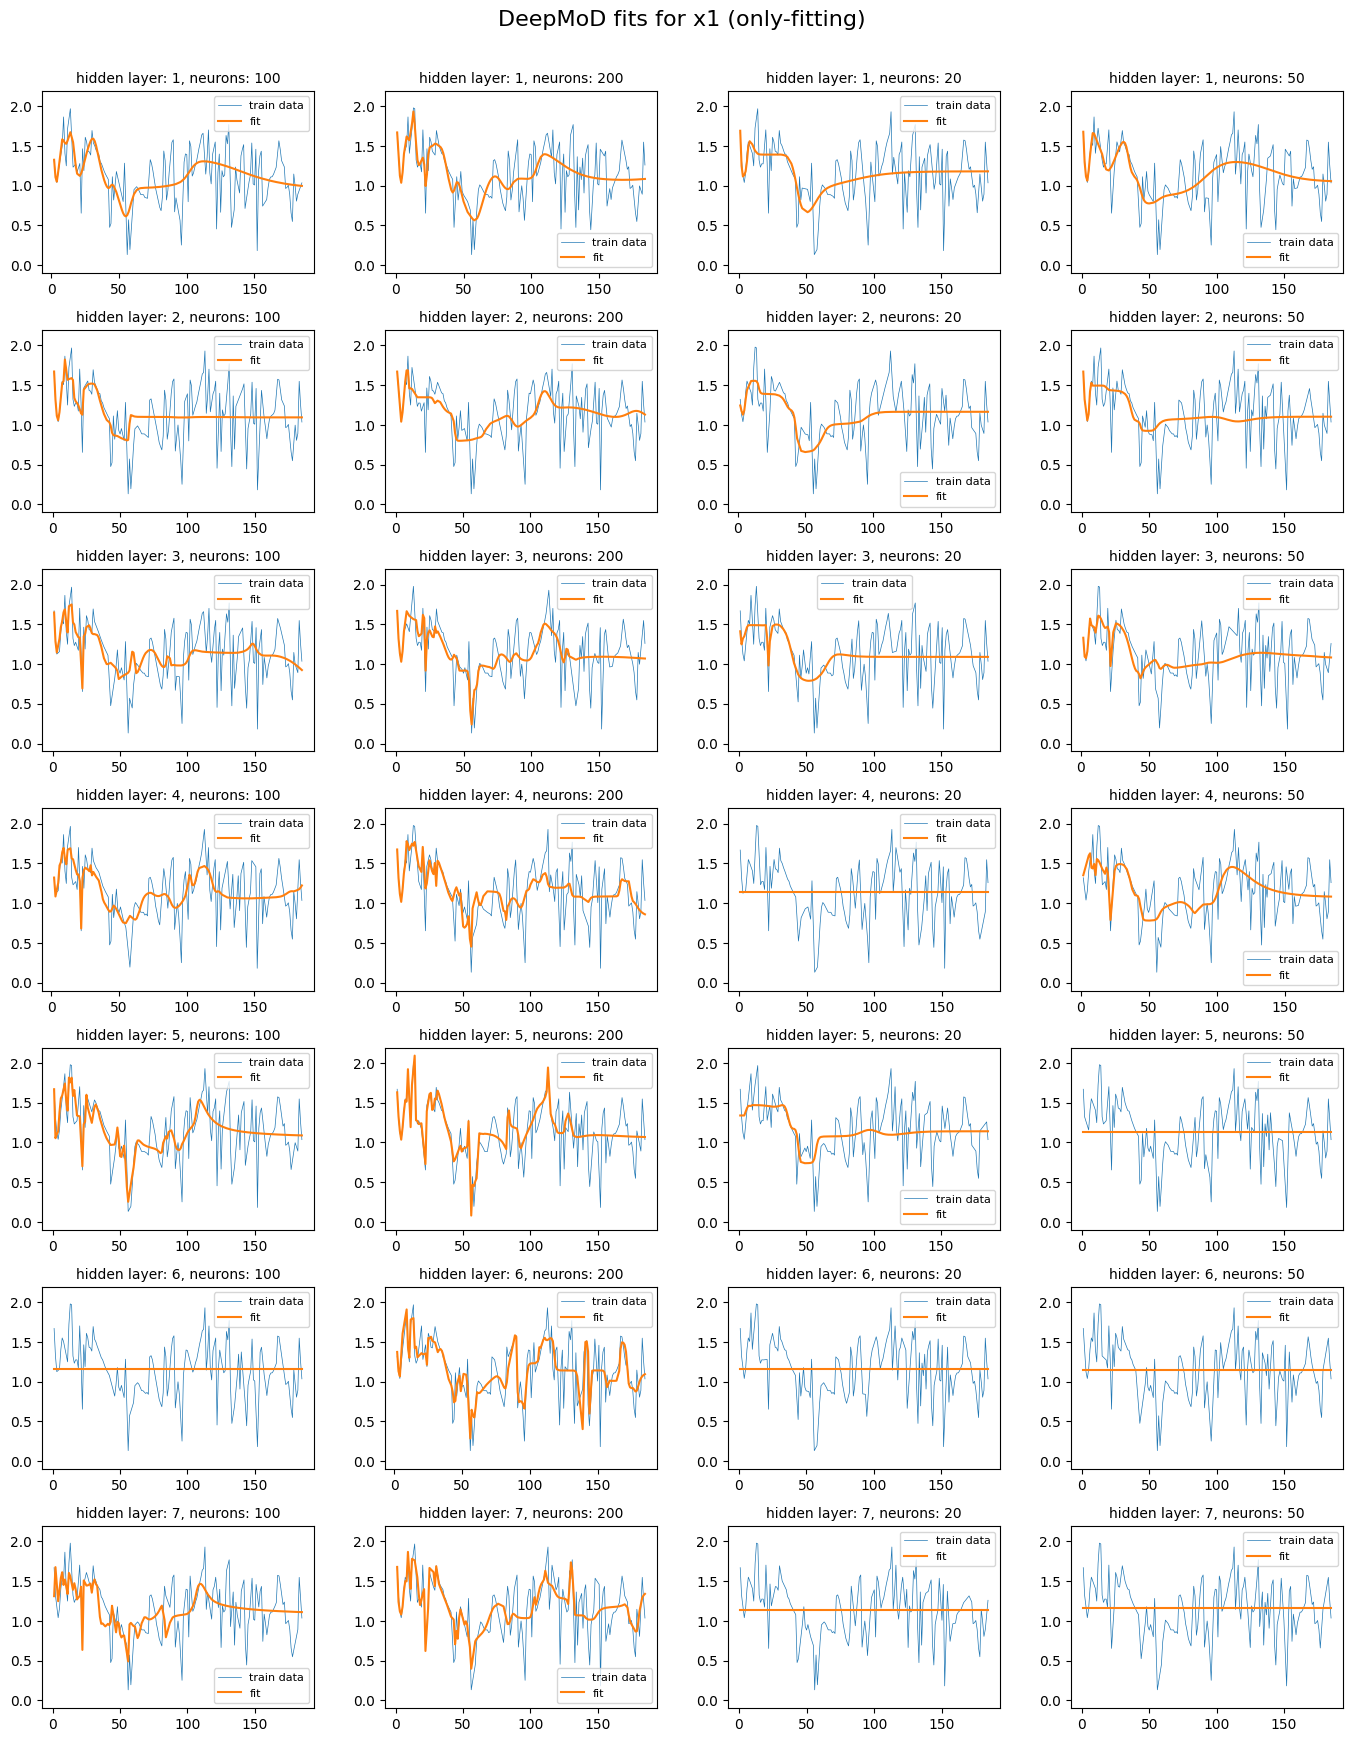

In [ ]:
out_dir = out_dir_org #+ "int2/"

# for taxon in np.arange(1, n_taxa + 1):
taxon = 1
for spec in ["only-fitting"]:
    # spec = "only-fitting" # "int2" "only-fitting" --> set to "" to get all outputs of the folder
    runs = []
    for file in [s for s in os.listdir(out_dir) if spec in s]:
        m = re.search('run(.+?)_', file)
        if m:
            runs.append(file)
    # specify dimensions of the plot
    n_runs = len(runs)

    if(n_runs > 0):
        # n_runs = len(os.listdir(out_dir))
        # set plot dimensions
        n_col = min(math.ceil(n_runs/2), 4) # 4 rows, except count is <= 4
        n_row = math.ceil((n_runs)/n_col)

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)
        fig.suptitle(f"DeepMoD fits for x{taxon} ({spec})",
                    size=16, y=1.0)
        fig.tight_layout(pad=2.0)  
        
        overall_min = 0
        overall_max = 0

        y = 0

        for run in runs:
            plot_path_tmp = f"{out_dir}{run}/Data/"
            if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                # read data files
                df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                # convert files to numpy array
                data_train = np.array(df_data_train)
                pred = np.array(df_pred)
                # make plot
                axs[int(y/n_col), (y % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data",  linewidth=0.5)
                axs[int(y/n_col), (y % n_col)].plot(pred[:,1], pred[:,0], label = "fit")
                # axs[int(y/n_col), (y % n_col)].scatter(data_train[:,1], data_train[:,0], label = "data", s = 1, color = colors[1])
                axs[int(y/n_col), (y % n_col)].legend(fontsize="8")
                hl = re.search(r"ALR_(\d{1,2})_(\d{2,3})", run)
                axs[int(y/n_col), (y % n_col)].set_title(f"hidden layer: {hl.group(1)}, neurons: {hl.group(2)}", size = 10)
                y += 1

                # get smallest and largest value to scale the y axis
                current_min = min(data_train[:,0].min(), pred[:,0].min())
                current_max = max(data_train[:,0].max(), pred[:,0].max())
                overall_max = max(overall_max, current_max)
                overall_min = min(overall_min, current_min)
        
        plt.setp(axs, ylim=(overall_min - 0.1, overall_max + 0.1))

        # save plots in one file
        # plt.savefig(f'{out_dir}/approximations_{spec}_x{taxon}.pdf',
        #             bbox_inches='tight', dpi = 300)
        # plt.close()
        plt.show()

## Noisy datasets

In [141]:
out_dir = out_dir_org # + "ALR/"
# batch = "batch_10-05_3DLV_runth05"
# batch = "batch_10-12_VanderPol"
additional_name = ""

for hl_number in [2, 5]: # , 10, 20, 50
    for hl_size in [40, 50, 60, 100, 200]: #
        for th in ["th0-001", "th0-1", "th0-01", "only-fitting"]: # "0_1", "0_01", , "0-01"
            # for int_order in [4]:
                for noise in ["0-2", "1", "5"]:
                    # spec = f'_{hl_number}_{hl_size}_{th}_int{int_order}'
                    spec = f'_{hl_number}_{hl_size}_{th}'
                    # get list of available runs for the given setting
                    runs = []
                    for file in [s for s in os.listdir(out_dir) if spec in s and f"noise{noise}" in s]:
                        m = re.search('run(.+?)_', file)
                        if m:
                            runs.append(m.group(1))
                    # specify dimensions of the plot
                    n_runs = len(runs)
                    # check if runs for these specifications are available
                    if n_runs > 0:
                        # set plot dimensions
                        n_row = max(n_runs, 2)
                        n_col = n_taxa

                        # make plot
                        fig, axs = plt.subplots(n_row, n_col)
                        fig.set_figwidth(5*n_col)
                        fig.set_figheight(3*n_row)
                        fig.suptitle(f"""{batch}\n
                                    hidden layers: number={hl_number} of size={hl_size},\n
                                    threshold = {th}""",
                                    # interaction order: {int_order}""",
                                    size=16, y=1.0)
                        fig.tight_layout(pad=2.0)
                        y = 0
                        for run in runs:
                            plot_path_tmp = f"{out_dir}output_{batch}_run{run}_noise{noise}{spec}/Data/"
                            # print(plot_path_tmp)
                            if os.path.exists(f"{plot_path_tmp}prediction_x1.csv"):
                                for taxon in np.arange(1,(n_taxa+1)):
                                    # read data files
                                    df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                                    df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                                    # convert files to numpy array
                                    data_train = np.array(df_data_train)
                                    pred = np.array(df_pred)
                                    # make plot
                                    axs[int(y/n_col), (taxon-1)].plot(data_train[:,1], data_train[:,0], label = "data")
                                    axs[int(y/n_col), (taxon-1)].plot(pred[:,1], pred[:,0], label = "u_hat")
                                    axs[int(y/n_col), (taxon-1)].legend()
                                    axs[int(y/n_col), (taxon-1)].set_title(f"x{taxon}")
                                    # axs[int(y/n_col), (taxon-1)].set_ylim([-0.05, 0.5])
                                    y += 1
                                axs[int((y-n_taxa)/n_col), 0].annotate(f"run {run}", xy=(0, 0.5), 
                                                                xytext=(-axs[int((y-n_taxa)/n_col), 0].yaxis.labelpad - 5, 0),
                                        xycoords=axs[int((y-n_taxa)/n_col), 0].yaxis.label, textcoords='offset points',
                                        size='large', ha='right', va='center')
                        # # save plots in one file
                        # plt.savefig(f'{out_dir}/predictions_{batch}{spec}_noise{noise}.pdf',
                        #             bbox_inches='tight', dpi = 200)
                        # plt.close()

## Plot fits regarding to hidden layer number and size

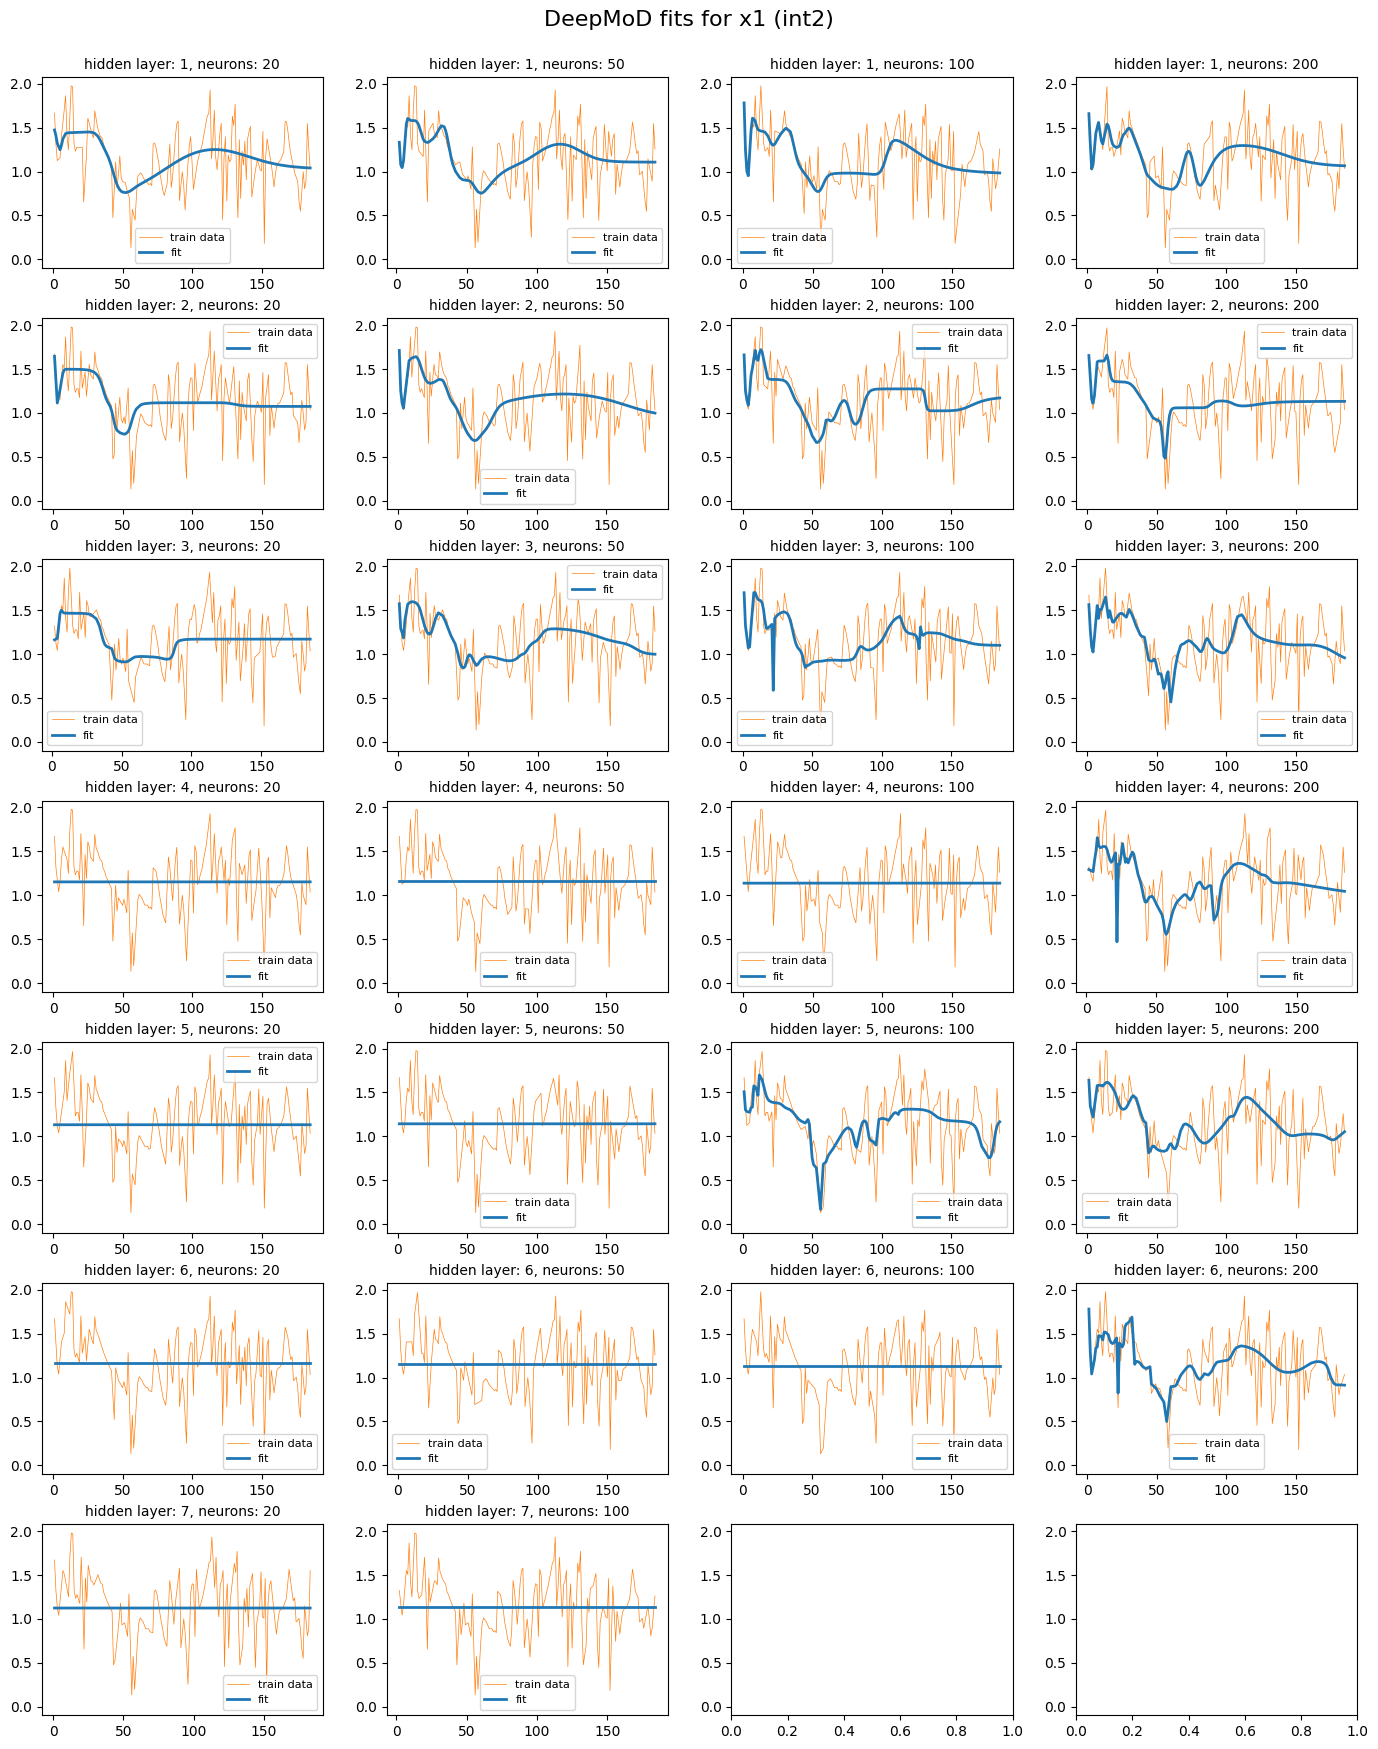

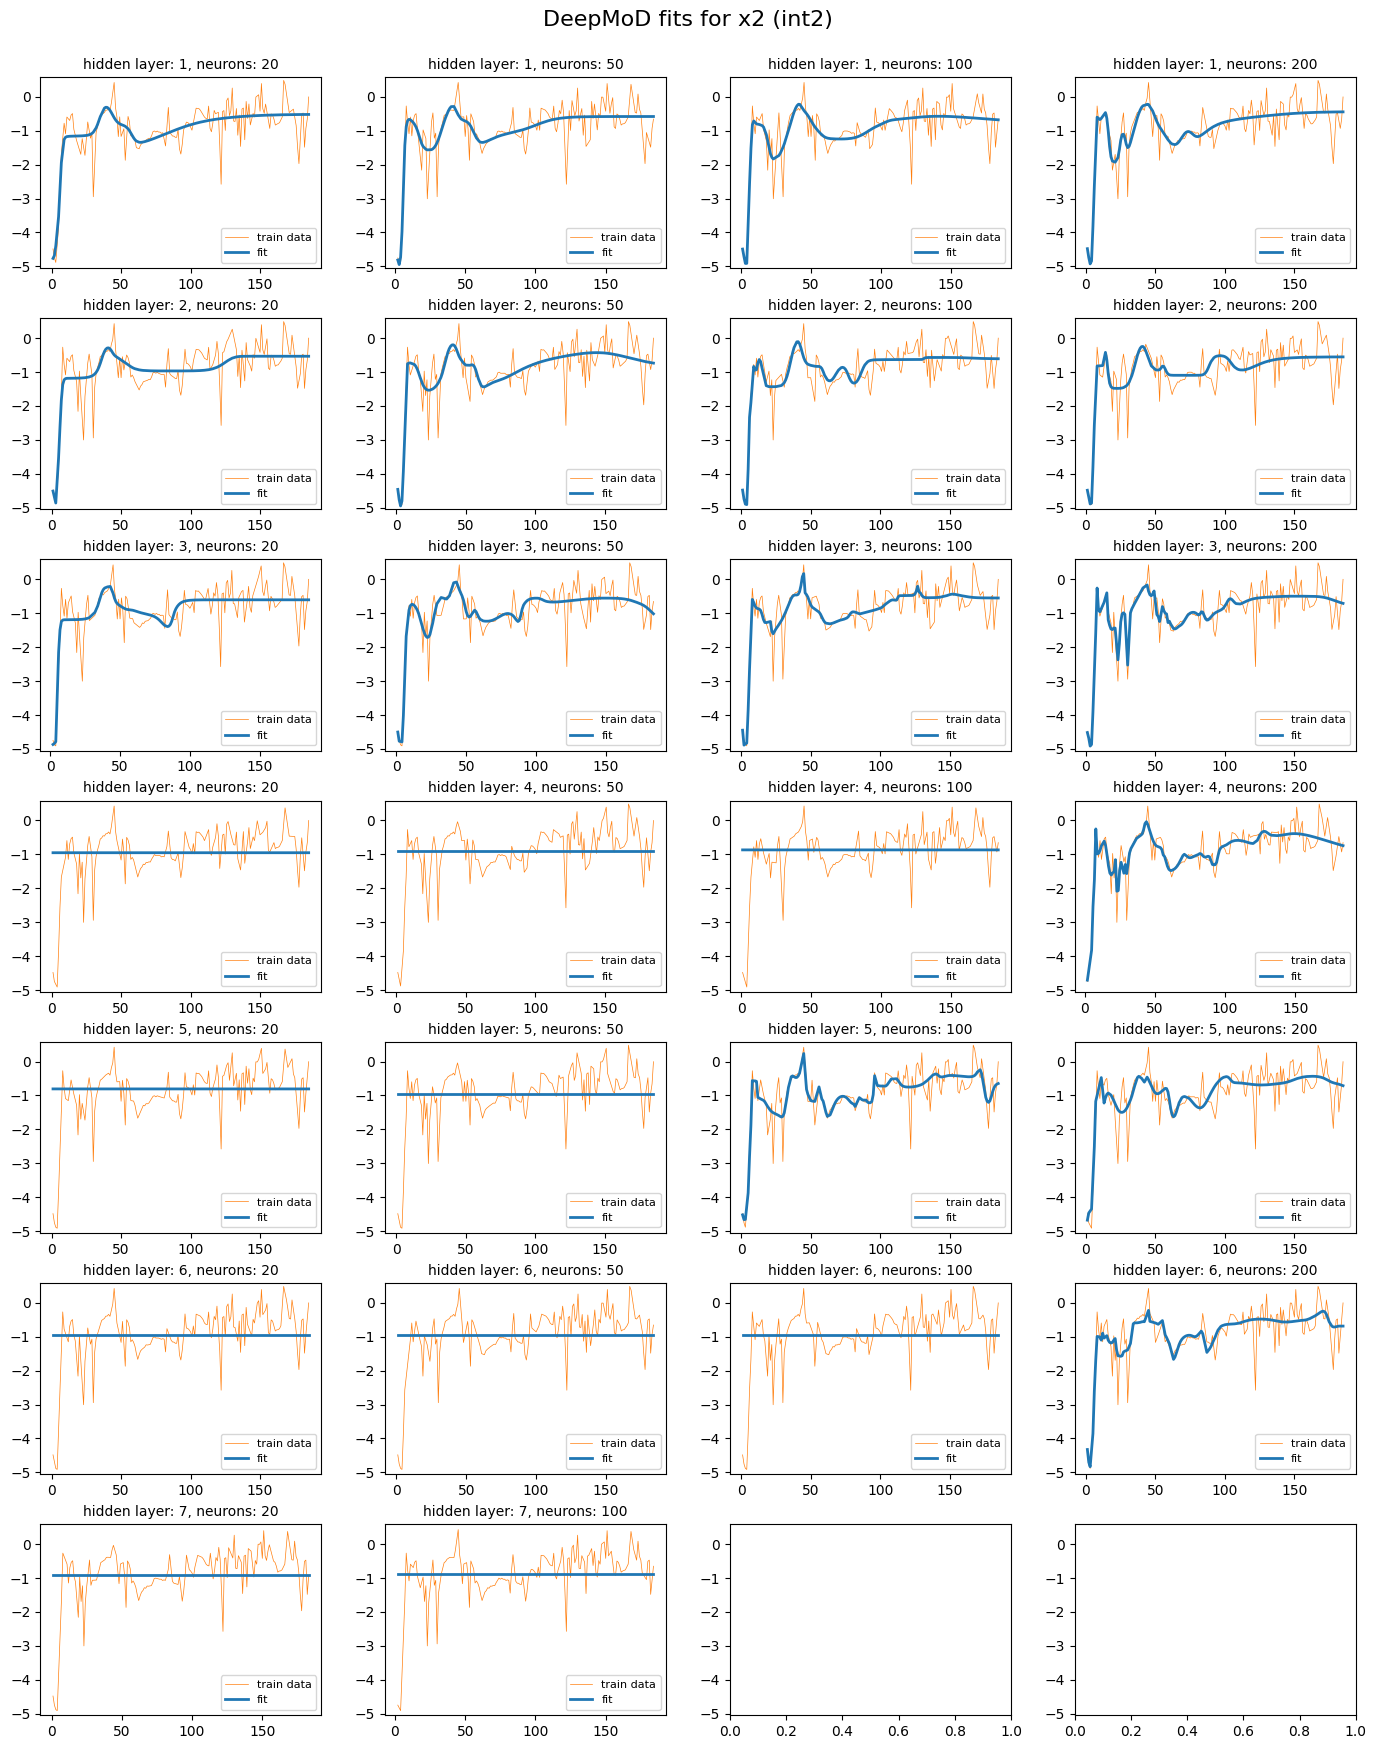

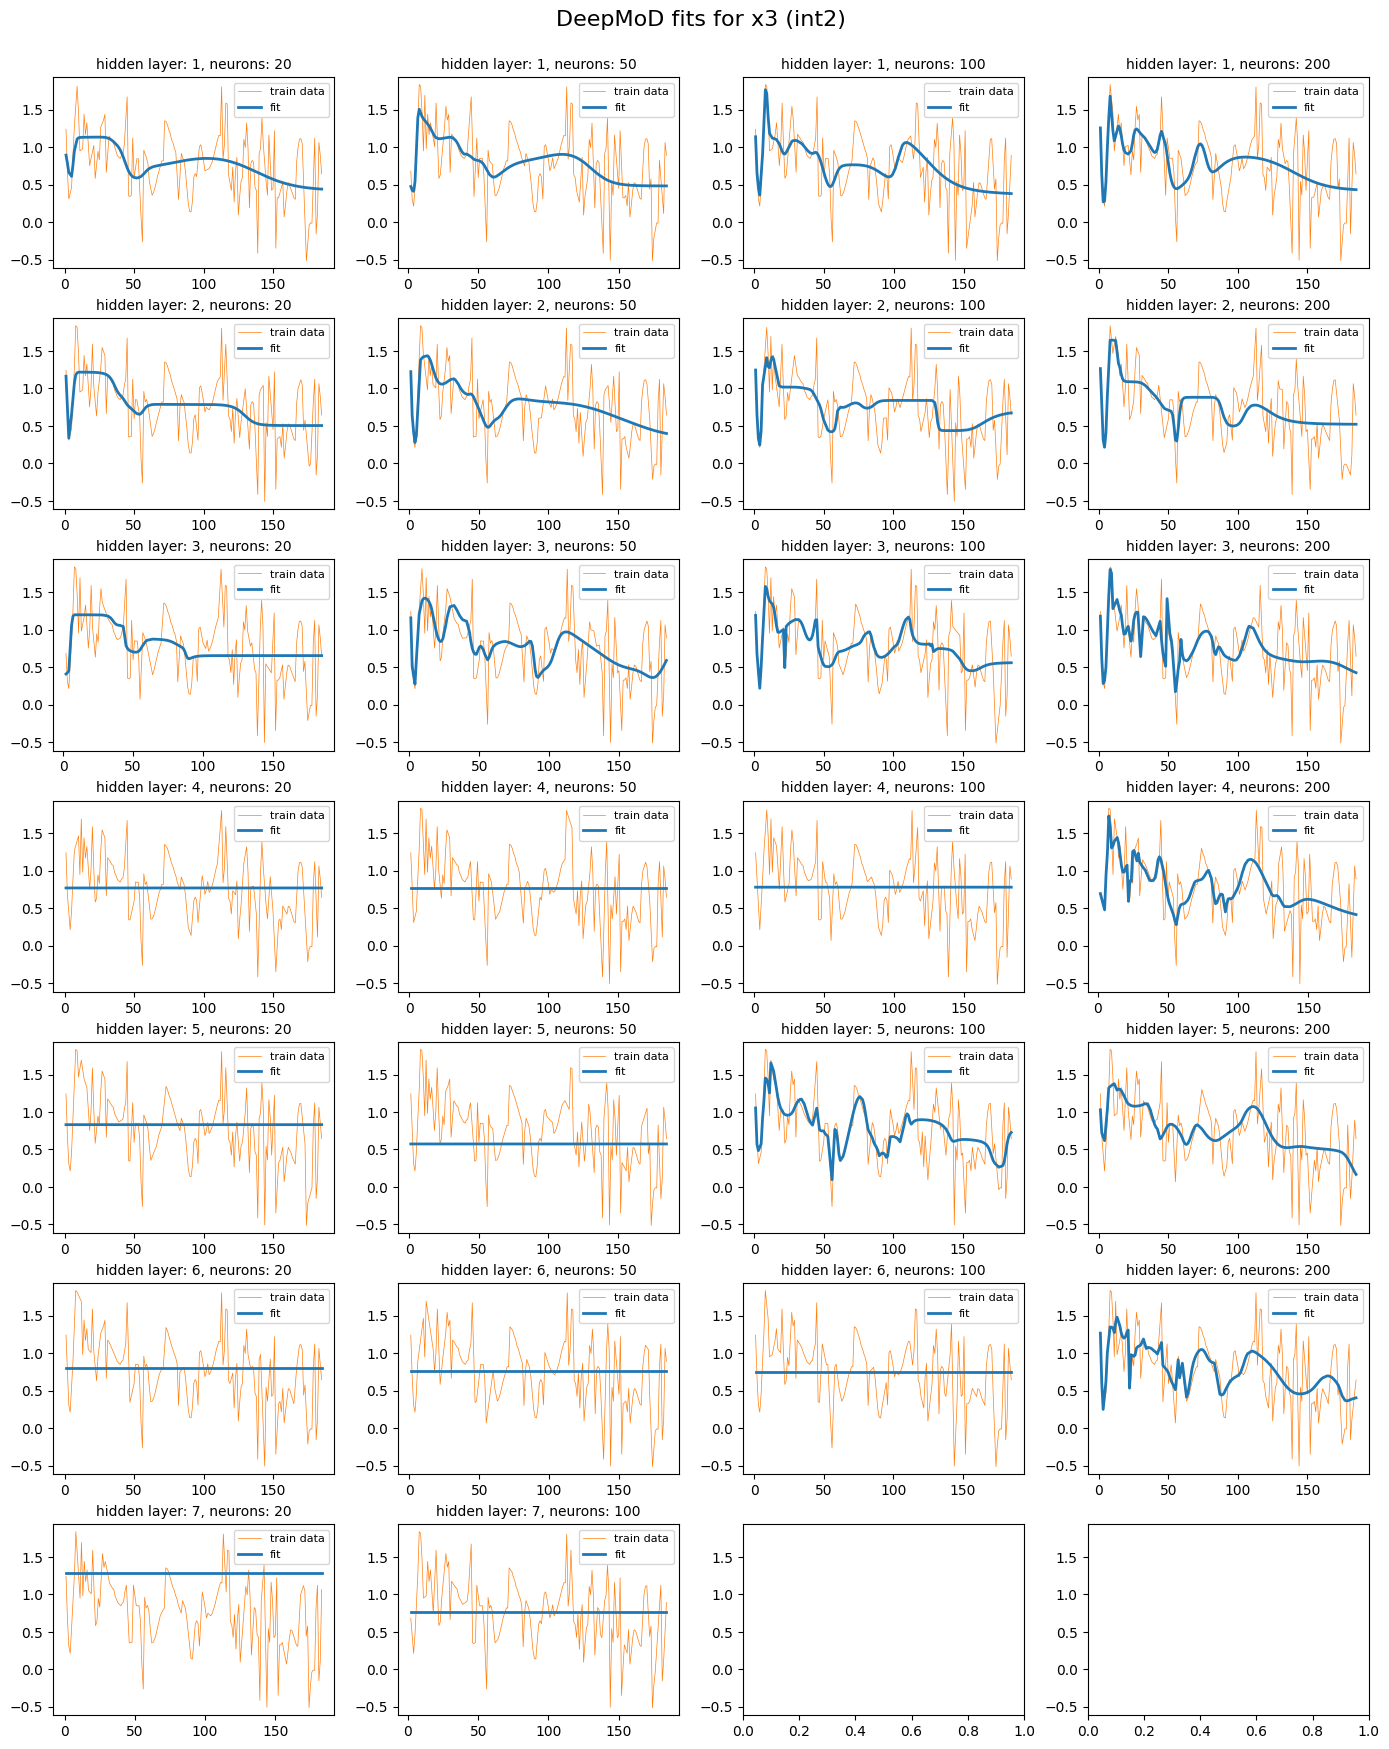

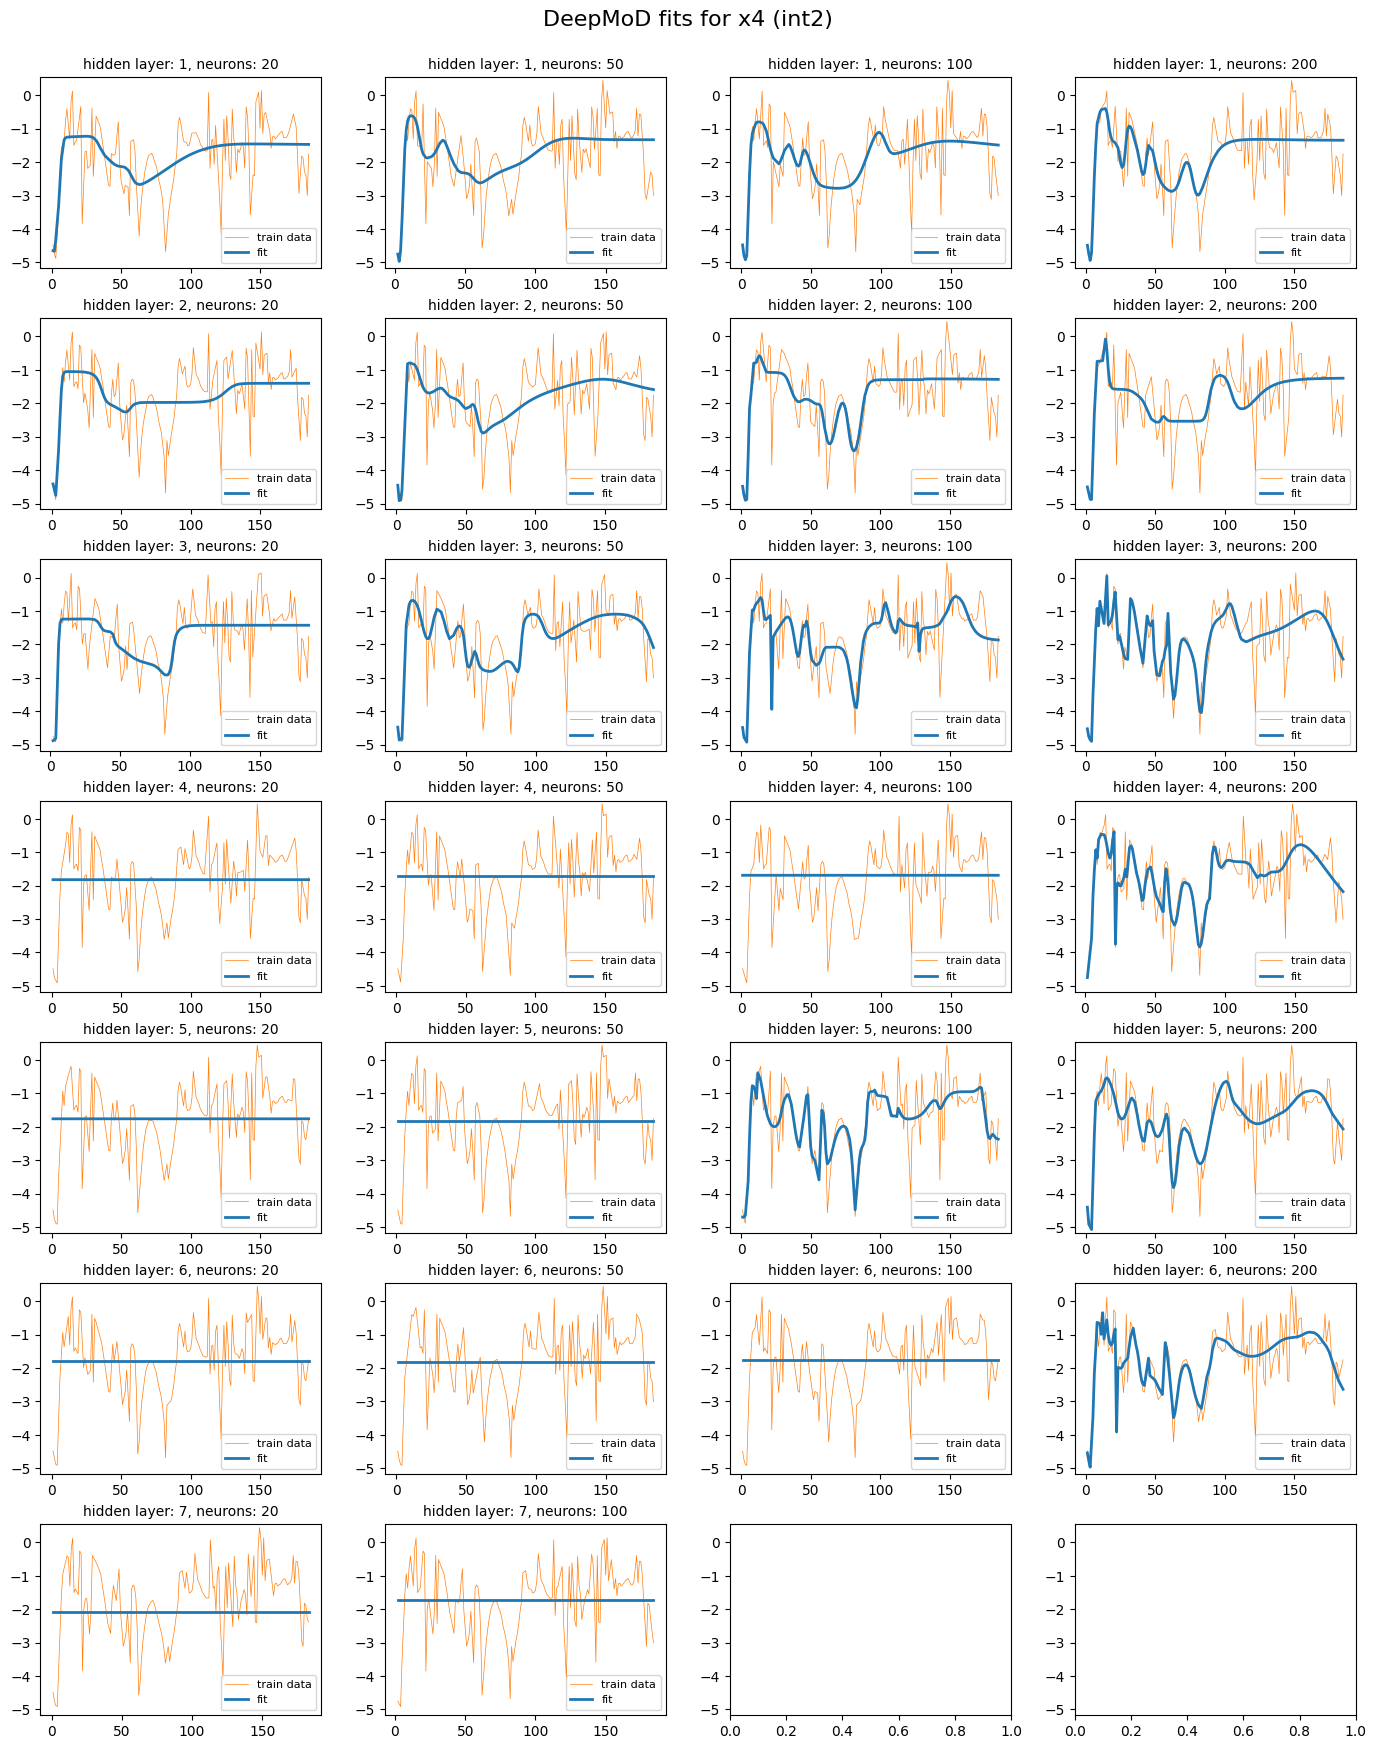

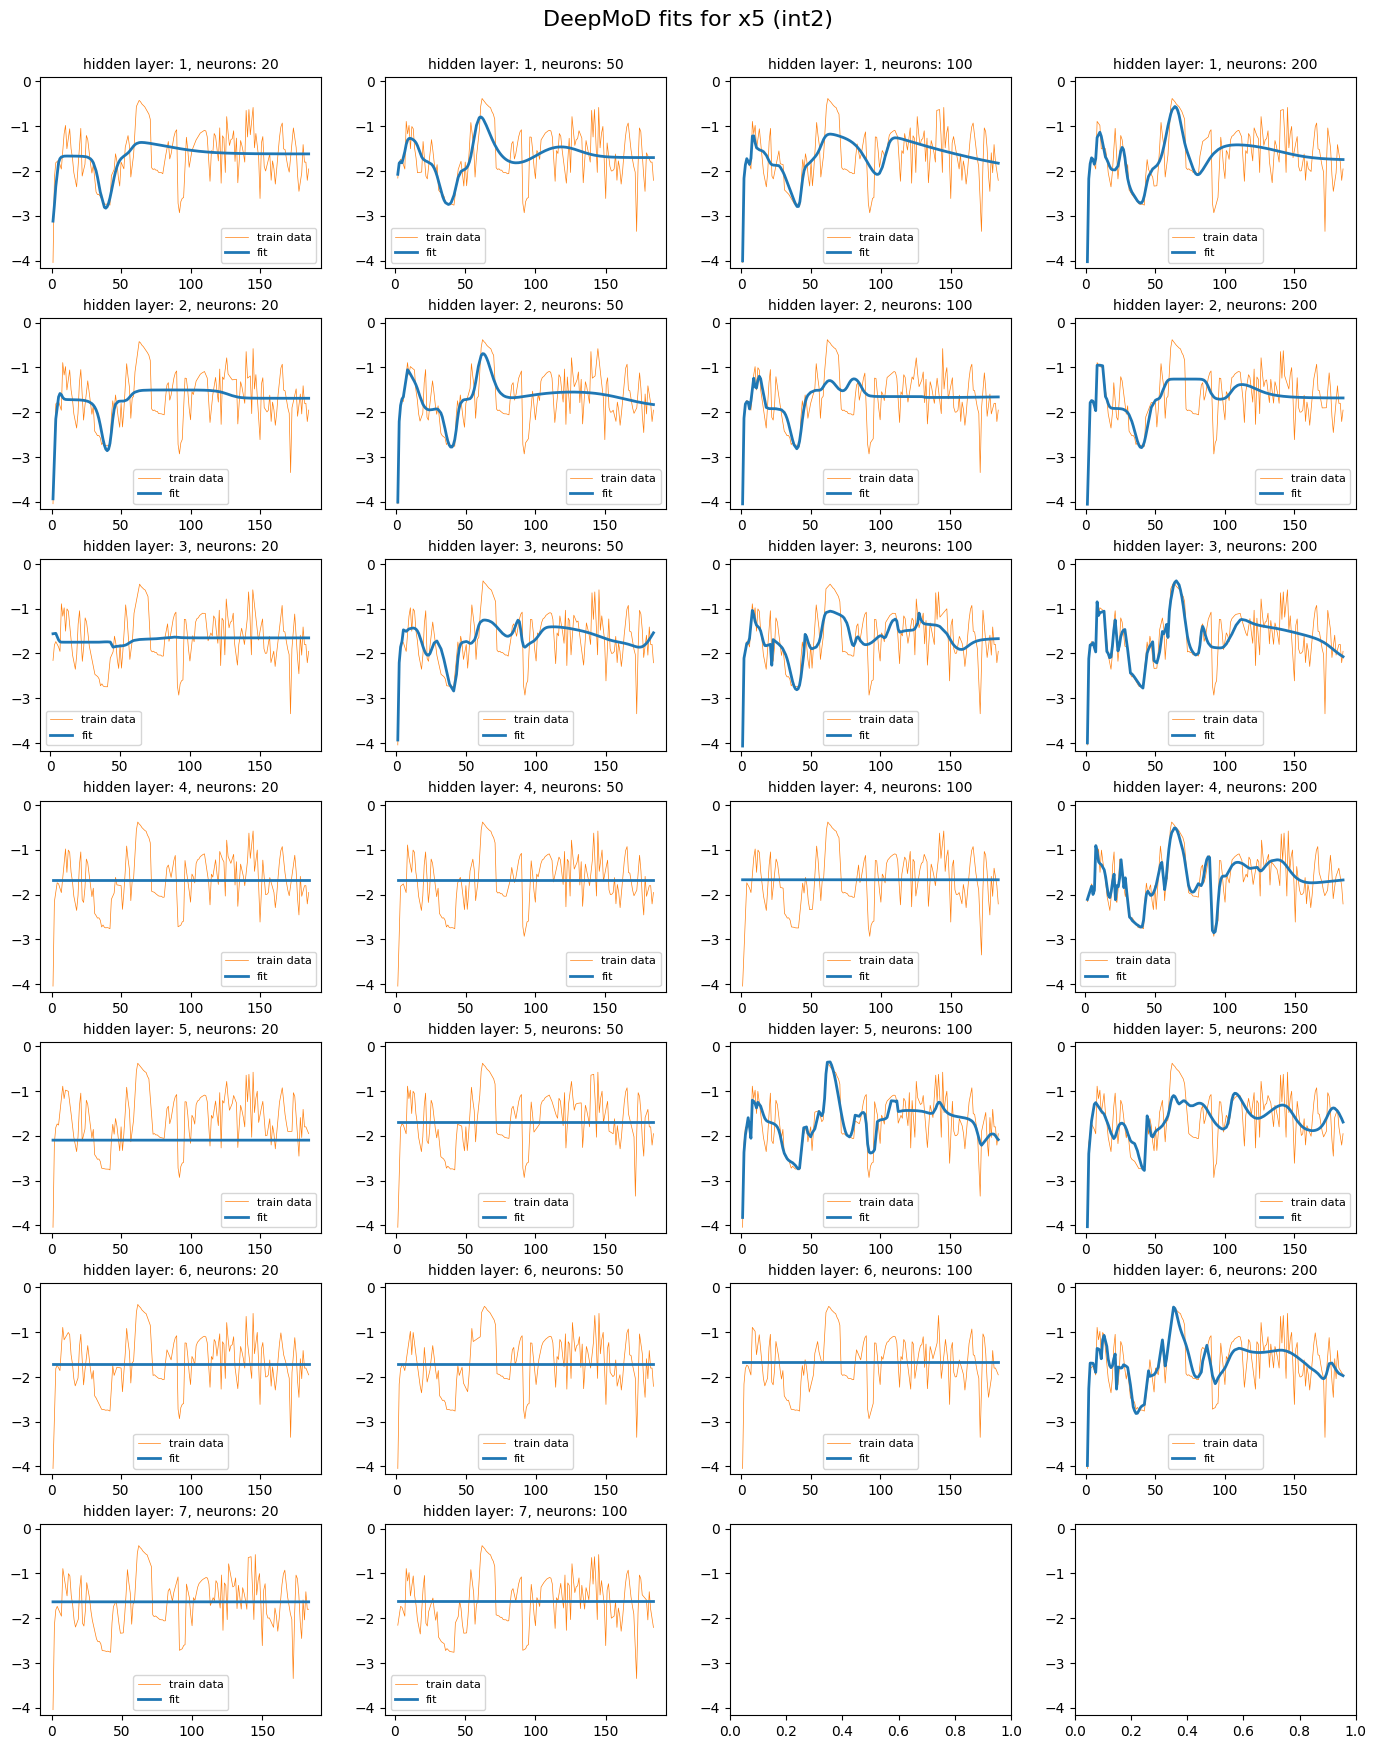

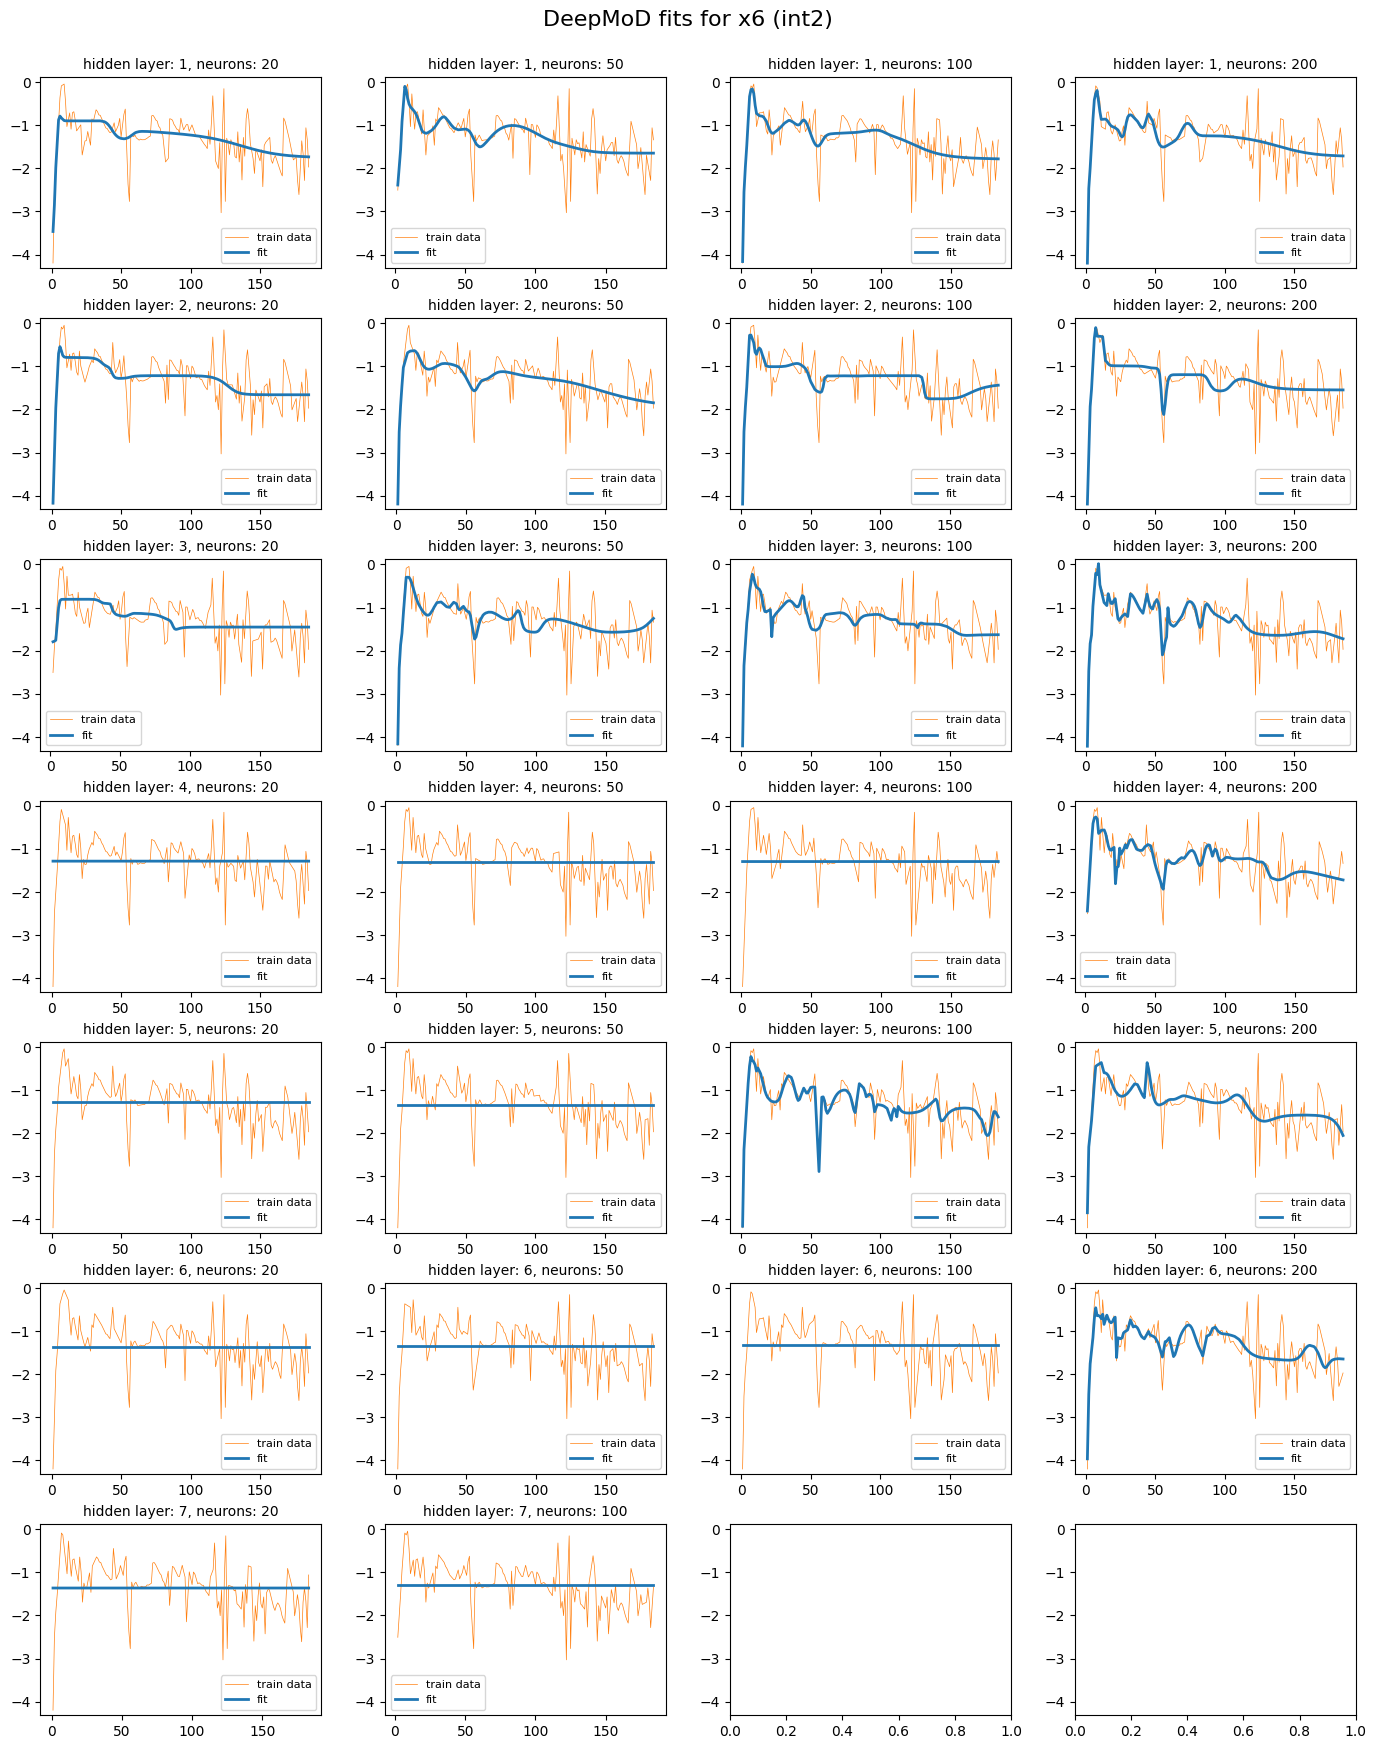

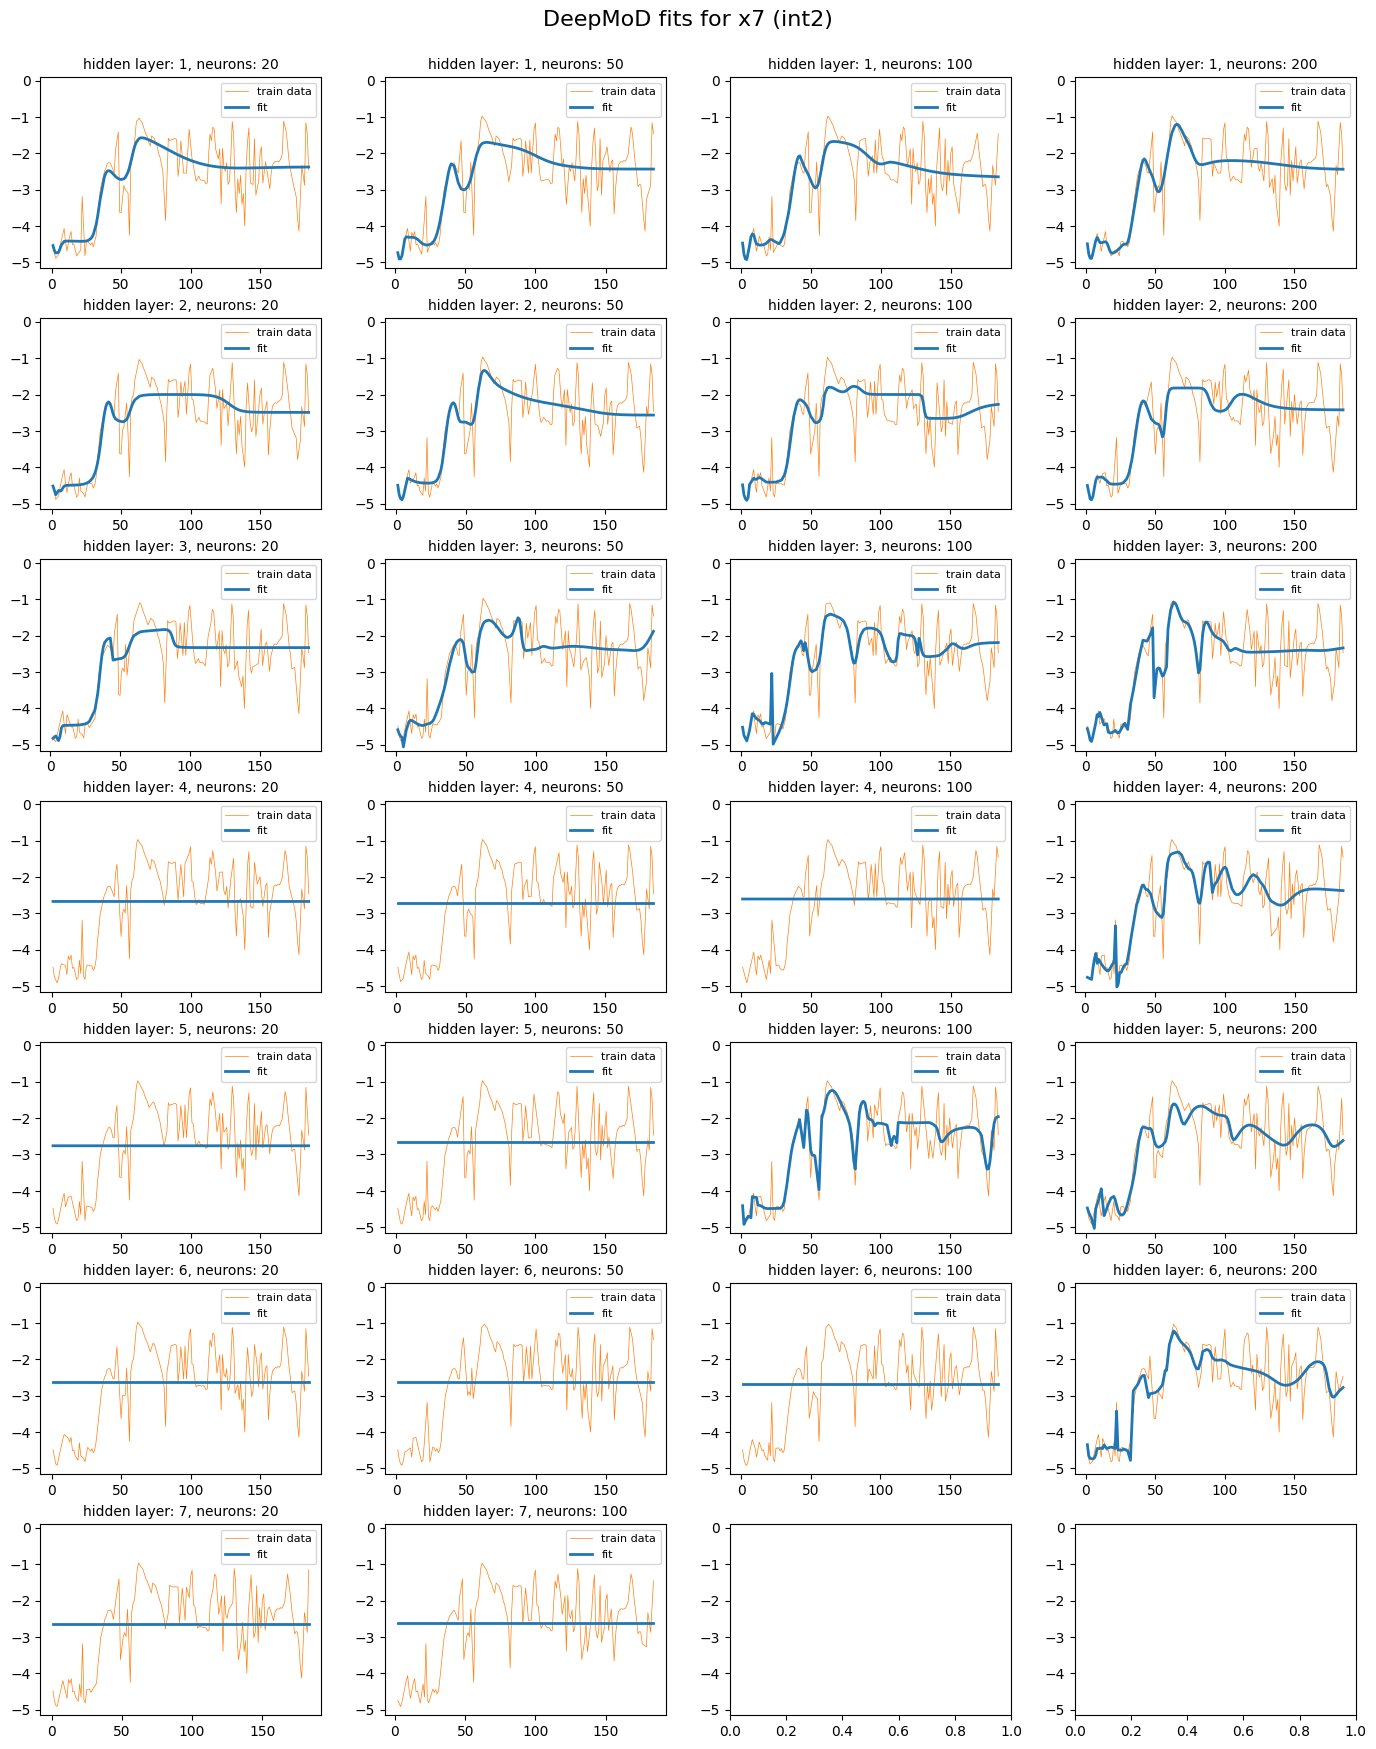

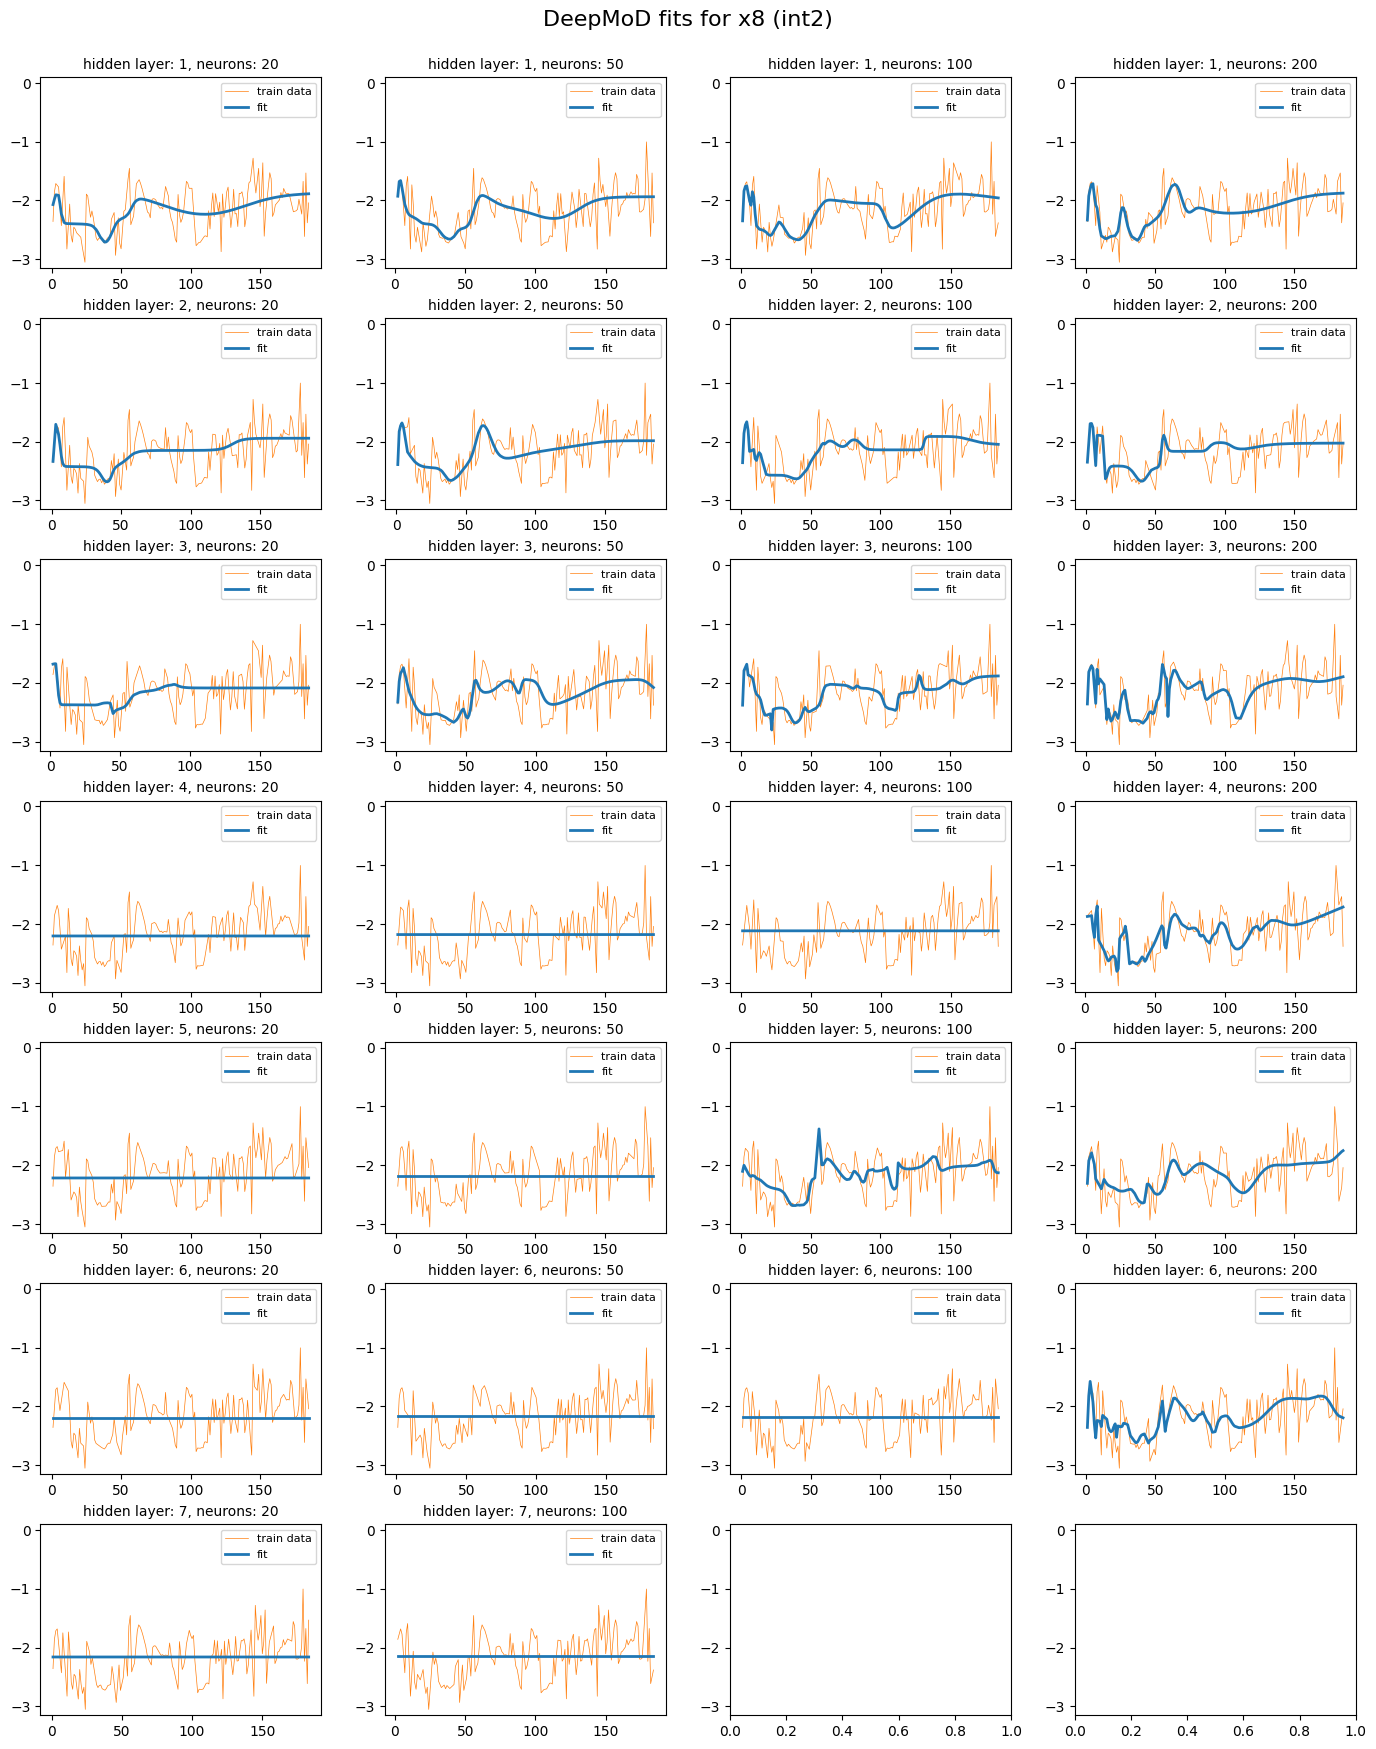

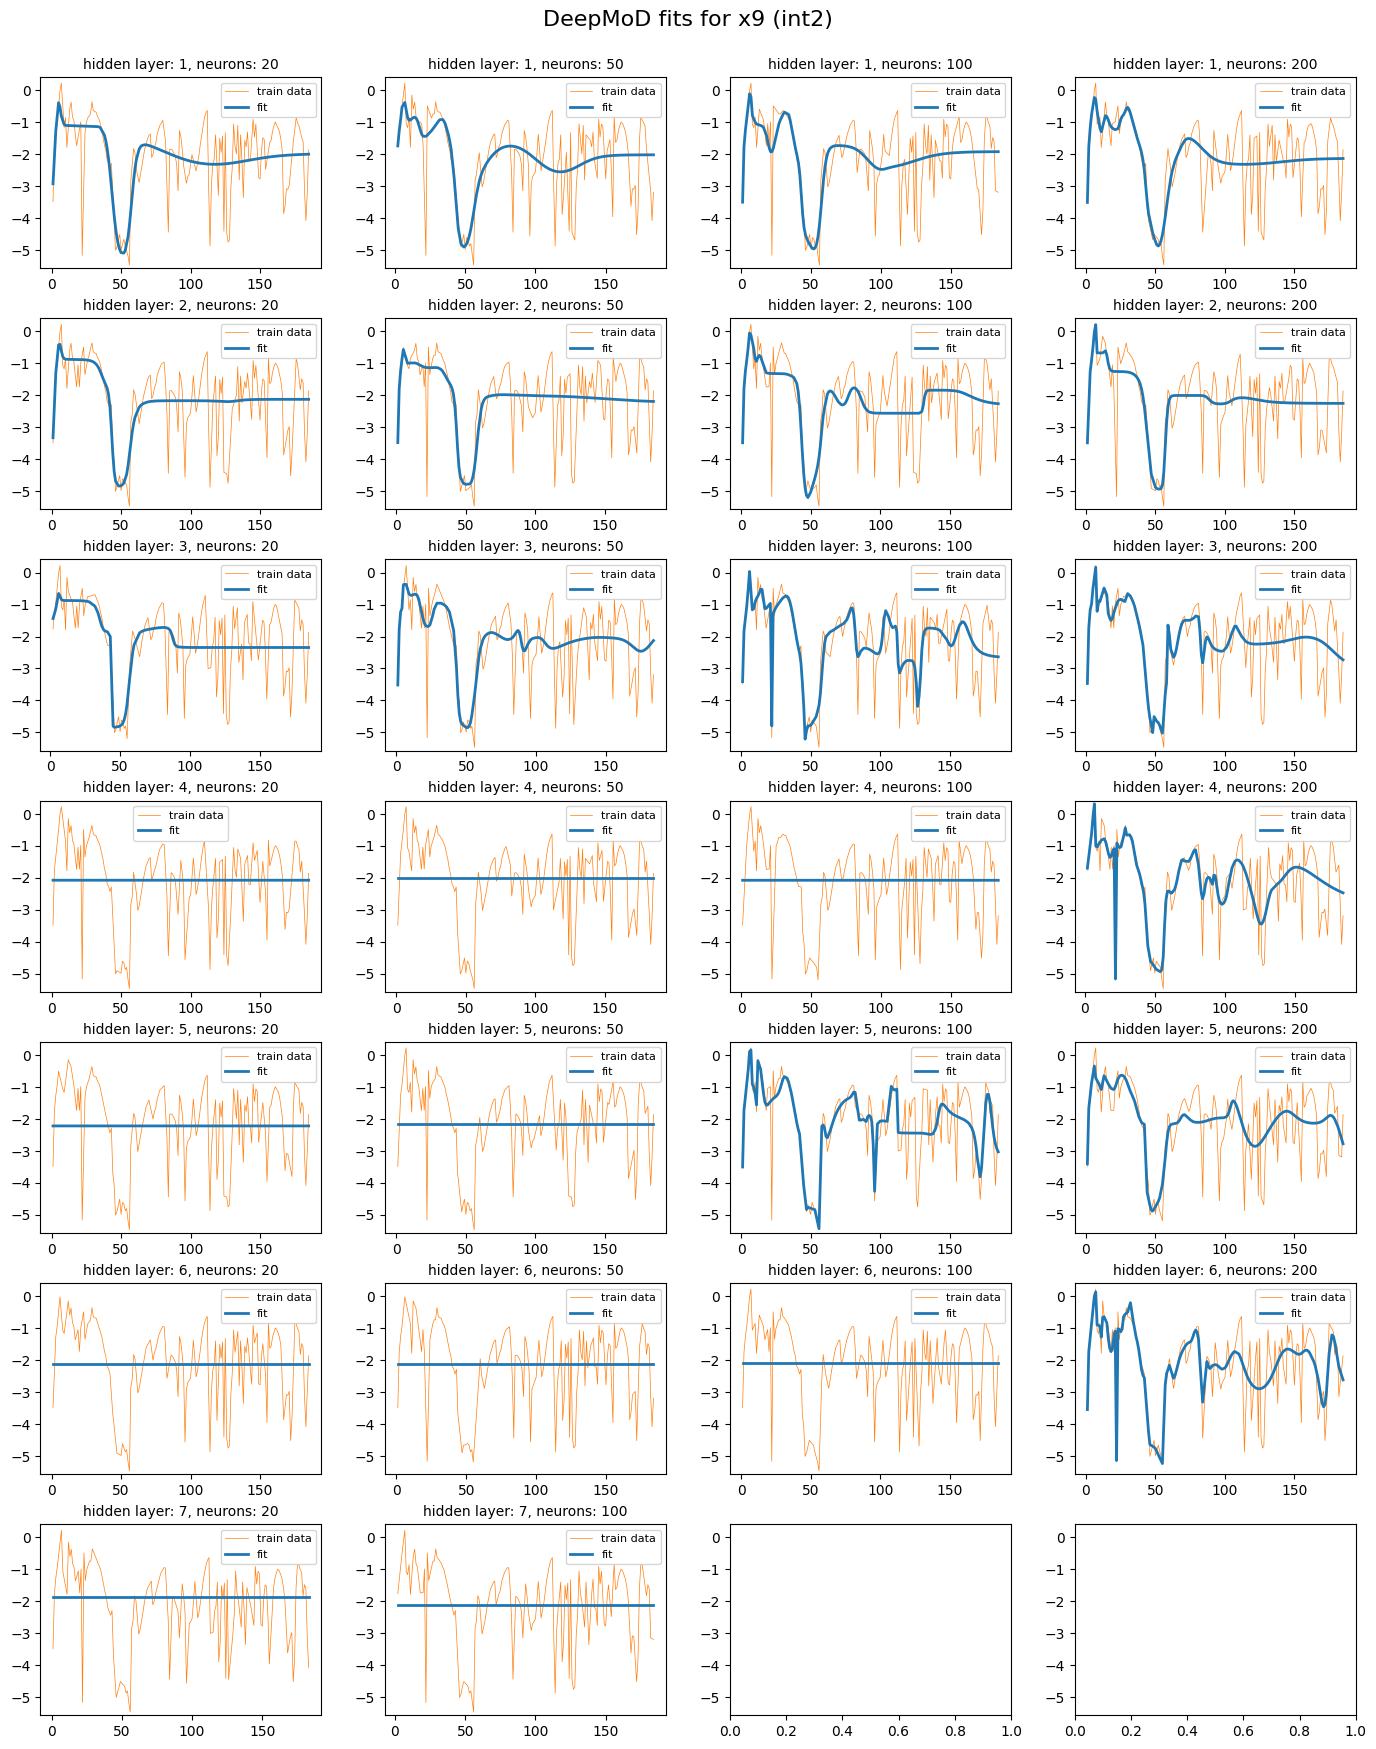

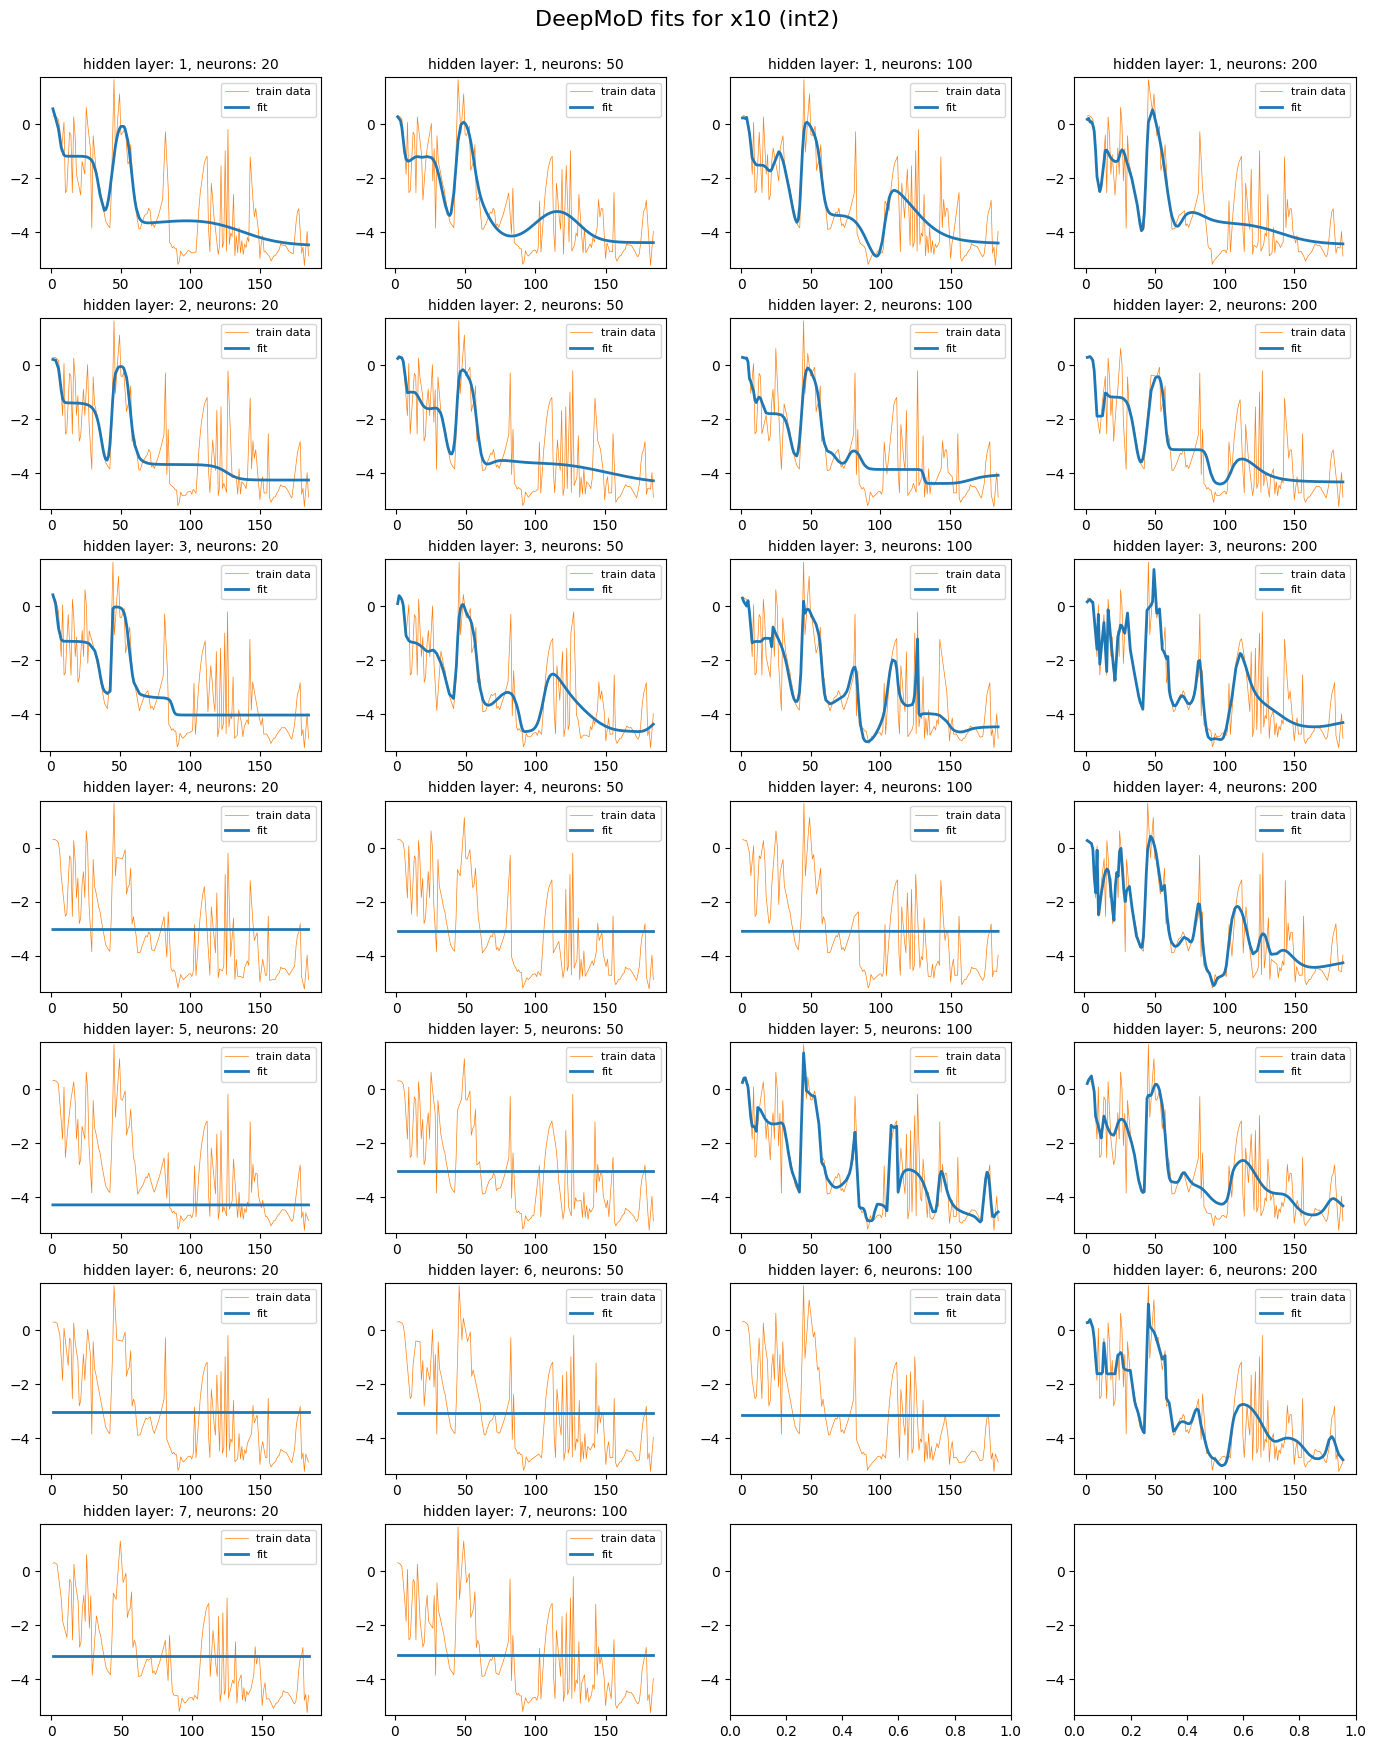

In [138]:
out_dir = out_dir_org #+ "int2/"

for taxon in np.arange(1, n_taxa + 1):
    # taxon = 1
    for lib in ["int2"]:
        # spec = "only-fitting" # "int2" "only-fitting" --> set to "" to get all outputs of the folder

        # count number of runs in this folder
        count = sum(1 for element in os.listdir(out_dir) if lib in element and not "." in element)

        # set plot dimensions
        n_col = min(math.ceil(count/2), 4) # 4 rows, exept count is <= 4
        n_row = math.ceil((count)/n_col)

        # make plot
        fig, axs = plt.subplots(n_row, n_col)
        fig.set_figwidth(3.5*n_col)
        fig.set_figheight(2.5*n_row)
        fig.suptitle(f"DeepMoD fits for x{taxon} ({lib})",
                    size=16, y=1.0)
        fig.tight_layout(pad=1.5)  

        overall_min = 0
        overall_max = 0

        y = 0

        for hl_number in np.arange(1,8):
            for hl_size in [20, 50, 100, 200]:
                spec = f"_{hl_number}_{hl_size}_"
                runs = []
                for file in [s for s in os.listdir(out_dir) if spec in s and lib in s]:
                    m = re.search('run(.+?)_', file)
                    if m:
                        runs.append(file)
                # specify dimensions of the plot
                n_runs = len(runs)

                if(n_runs > 0):
                    for run in runs:
                        plot_path_tmp = f"{out_dir}{run}/Data/"
                        if os.path.exists(f"{plot_path_tmp}/prediction_x{taxon}.csv"):
                            # read data files
                            df_pred = pd.read_csv(f"{plot_path_tmp}prediction_x{taxon}.csv", header=[0])
                            df_data_train = pd.read_csv(f"{plot_path_tmp}data_train_x{taxon}.csv", header=[0])
                            # convert files to numpy array
                            data_train = np.array(df_data_train)
                            pred = np.array(df_pred)
                            # make plot
                            axs[int(y/n_col), (y % n_col)].plot(data_train[:,1], data_train[:,0], label = "train data", linewidth=0.5, color = colors[1])
                            axs[int(y/n_col), (y % n_col)].plot(pred[:,1], pred[:,0], label = "fit", linewidth=2)
                            # axs[int(y/n_col), (y % n_col)].scatter(data_train[:,1], data_train[:,0], label = "data", s = 1)
                            axs[int(y/n_col), (y % n_col)].legend(fontsize="8")
                            hl = re.search(r"ALR_(\d{1,2})_(\d{2,3})", run)
                            axs[int(y/n_col), (y % n_col)].set_title(f"hidden layer: {hl.group(1)}, neurons: {hl.group(2)}", size = 10)
                            y += 1

                            # get smallest and largest value to scale the y axis
                            current_min = min(data_train[:,0].min(), pred[:,0].min())
                            current_max = max(data_train[:,0].max(), pred[:,0].max())
                            overall_max = max(overall_max, current_max)
                            overall_min = min(overall_min, current_min)
                #     axs[0, (y % n_col)].set_title(f"neurons: {hl_size}", size = 10)
                # axs[hl_number-1, 0].annotate(f"hidden layer: {hl_number}", xy=(0, 0.5), xytext=(-axs[hl_number-1, 0].yaxis.labelpad - 5, 0),
                #                             xycoords=axs[hl_number-1, 0].yaxis.label, textcoords='offset points',
                #                             size=10, ha='right', va='center', rotation=90)
                    
        plt.setp(axs, ylim=(overall_min - 0.1, overall_max + 0.1))

        # # save plots in one file
        # plt.savefig(f'{out_dir}/approximations_{lib}_x{taxon}.pdf',
        #             bbox_inches='tight', dpi = 300)
        # plt.close()